## **_Import deps_**

In [1]:
import sys
from pathlib import Path
src_dir = Path.cwd().parent
sys.path.append(str(src_dir))
import pandas as pd

## **_Read Gold Set_**

In [2]:
gold_set = pd.read_json(src_dir / "data/raw/gold_annotations.json")

In [8]:
gold_set.drop_duplicates()

,accessionnumber,reporter_name,reported_company,company_name,relationship_type,sents_scores,aggregation_results,winning_relation,old_new_match,sentence,sent_relation,sent_score,concept_class,top2concepts,concept_score,Label
0,0000002488-16-000111,Advanced Micro Devices Inc,Microsoft Corporation,Microsoft Corporation,customer,"{'customer_scores': [1.0, 0.99, 0.99, 0.99, 1....","{'supplier': 2.95, 'customer': 23.88, 'other': 0}",customer,1,The success of ADVANCED MICRO DEVICES Inc semi...,customer,1.00,supply_chain,"('supply_chain', 'product_related')",0.323242,1
1,0000002488-16-000111,Advanced Micro Devices Inc,Microsoft Corporation,Microsoft Corporation,customer,"{'customer_scores': [1.0, 0.99, 0.99, 0.99, 1....","{'supplier': 2.95, 'customer': 23.88, 'other': 0}",customer,1,The success of ADVANCED MICRO DEVICES Inc semi...,customer,0.99,supply_chain,"('supply_chain', 'product_related')",0.346191,1
2,0000002488-16-000111,Advanced Micro Devices Inc,Microsoft Corporation,Microsoft Corporation,customer,"{'customer_scores': [1.0, 0.99, 0.99, 0.99, 1....","{'supplier': 2.95, 'customer': 23.88, 'other': 0}",customer,1,The success of ADVANCED MICRO DEVICES Inc semi...,customer,0.99,supply_chain,"('supply_chain', 'revenue')",0.315918,1
3,0000002488-16-000111,Advanced Micro Devices Inc,Microsoft Corporation,Microsoft Corporation,customer,"{'customer_scores': [1.0, 0.99, 0.99, 0.99, 1....","{'supplier': 2.95, 'customer': 23.88, 'other': 0}",customer,1,"More recently, ADVANCED MICRO DEVICES Inc deve...",customer,0.99,product_related,"('product_related', 'supply_chain')",0.664551,1
4,0000002488-16-000111,Advanced Micro Devices Inc,Microsoft Corporation,Microsoft Corporation,customer,"{'customer_scores': [1.0, 0.99, 0.99, 0.99, 1....","{'supplier': 2.95, 'customer': 23.88, 'other': 0}",customer,1,"In addition, five customers, including Sony, M...",customer,1.00,revenue,"('revenue', 'supply_chain')",0.952148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,0001728949-18-000095,Qualcomm Inc,"Samsung Electronics Co., LTD.","Samsung Electronics Co., LTD.",customer,"{'supplier_scores': [0.99], 'customer_scores':...","{'supplier': 0.99, 'customer': 7.82, 'other': 0}",customer,0,"Further, the majority of the leading handset a...",customer,0.99,licensing_and_ip,"('licensing_and_ip', 'royalties')",0.864746,0
44357,0001728949-18-000095,Qualcomm Inc,"Samsung Electronics Co., LTD.","Samsung Electronics Co., LTD.",customer,"{'supplier_scores': [0.99], 'customer_scores':...","{'supplier': 0.99, 'customer': 7.82, 'other': 0}",customer,0,"Further, over 210 companies (including Huawei,...",customer,0.99,licensing_and_ip,"('licensing_and_ip', 'royalties')",0.866699,0
44358,0001728949-18-000095,Qualcomm Inc,"Samsung Electronics Co., LTD.","Samsung Electronics Co., LTD.",customer,"{'supplier_scores': [0.99], 'customer_scores':...","{'supplier': 0.99, 'customer': 7.82, 'other': 0}",customer,0,"QUALCOMM Inc reports that In fiscal 2019, 2018...",customer,0.97,revenue,"('revenue', 'supply_chain')",0.525391,0
44359,0001728949-18-000095,Qualcomm Inc,"Samsung Electronics Co., LTD.","Samsung Electronics Co., LTD.",customer,"{'supplier_scores': [0.99], 'customer_scores':...","{'supplier': 0.99, 'customer': 7.82, 'other': 0}",customer,0,"QUALCOMM Inc reports that In fiscal 2016, 2015...",customer,0.95,revenue,"('revenue', 'supply_chain')",0.930176,0


## **_EDA_**

In [27]:
print("Number of accission-numbers: {}".format(gold_set.accessionnumber.unique().shape[0]))

Number of accission-numbers: 3114


Sentences Count Over accession-numbers


<AxesSubplot: title={'center': 'Sentences Count Over accession-numbers'}, xlabel='accessionnumber'>

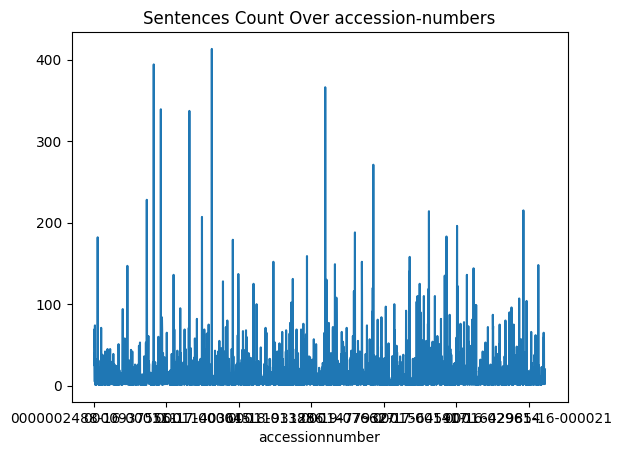

In [20]:
gold_set.groupby(['accessionnumber']).count().T.loc['sentence'].plot(title="Sentences Count Over accession-numbers")

# **`SpacyNER` VS `HF_NER`**

In [25]:
from src.language_model.trf_loader import TrfLoader
from src.language_model.spacy_loader import SpacyLoader
spacy_loader = SpacyLoader(lm="en_core_web_trf",
          entity_matcher=str(src_dir / "artifacts/matcher_model/"),
         load_matcher=True)

trf_loader  = TrfLoader(lm=str(src_dir / "artifacts/ner_model/"),
          entity_matcher=str(src_dir / "artifacts/matcher_model/"),
         load_matcher=True)

2023-10-03 12:04:07,851 — 🌌 spaCy — INFO — Language model used is en_core_web_trf
2023-10-03 12:04:07,853 — 🌌 spaCy — INFO — spaCy Work On GPU
2023-10-03 12:04:13,462 — 🌌 TrfTagger — INFO — Language model used is /notebooks/inferess-relation-extraction/artifacts/ner_model


In [28]:
sents, s_spans, s_org_groups, s_aliases = spacy_loader.predictor(gold_set['sentence'])

2023-10-03 12:05:35,172 — 🌌 spaCy — INFO — Start batch job for 3 chunks
2023-10-03 12:05:35,173 — 🌌 spaCy — INFO — process chunk#1 ...
2023-10-03 12:07:29,159 — 🌌 spaCy — INFO — process chunk#2 ...
2023-10-03 12:09:19,636 — 🌌 spaCy — INFO — process chunk#3 ...


  0%|          | 0/283 [00:00<?, ?it/s]

In [69]:
t_sents, t_spans, t_org_groups, t_aliases = trf_loader.predictor(gold_set['sentence'], org_thresh=0.7)

Batch Steps:   6%|▌         | 10/178 [00:12<03:32,  1.26s/it]/usr/local/lib/python3.9/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Batch Steps: 100%|██████████| 178/178 [03:48<00:00,  1.29s/it]


  0%|          | 0/276 [00:00<?, ?it/s]

In [33]:
assert all(t_sents == sents)

In [43]:
i = 7777
print(f"sents[{i}]: ", sents[i])
print(f"s_org_groups[{i}]: ", s_org_groups[i])
print(f"t_org_groups[{i}]: ", t_org_groups[i])


sents[7777]:  In order to meet potential commercial demand, if ALIS is approved, INSMED Inc funded the manufacturing expansion at Therapure in Canada that operates at a larger scale than Althea
s_org_groups[7777]:  {'INSMED Inc': 0, 'Therapure': 1, 'Althea': 2, 'ALIS': 3}
t_org_groups[7777]:  {'INSMED Inc': 0, 'Therapure': 1, 'Althea': 2}


In [49]:
text_orgs = pd.DataFrame({"sents": sents,
              "Spacy_Orgs":list(map(lambda x:set(x.keys()) , s_org_groups)),
              "SEC_Orgs":list(map(lambda x:set(x.keys()) , t_org_groups)),

             })

In [57]:
conflicts= text_orgs[text_orgs.apply(lambda x: x['Spacy_Orgs'] ^ x['SEC_Orgs'] != set() , axis=1)]

In [61]:
pd.set_option("display.max_colwidth", None)

In [65]:
conflicts.drop_duplicates('sents').sample(10)

,sents,Spacy_Orgs,SEC_Orgs
41639,Medicare and Medicaid reimbursements represented 18.8% of Brookdale Senior Living Inc CCRCs segment's resident fee revenue during such period,"{Medicare, Brookdale Senior Living Inc, Medicaid}",{Brookdale Senior Living Inc}
15455,"Under the terms of the agreement, Juno Therapeutics Inc paid Seattle Children's Research Institute an upfront payment of $200,000 and are required to pay to Seattle Children's Research Institute annual license maintenance fees, creditable against royalties and milestone payments due to SCH, of $50,000 per year for the first five years and $200,000 per year thereafter","{Juno Therapeutics Inc, SCH, Seattle Children's Research Institute}","{Juno Therapeutics Inc, Seattle Children's Research Institute}"
35763,Spirit AeroSystems Holdings Inc bear the potential risk that the US Government may unilaterally suspend Spirit AeroSystems Holdings Inc defense customers or Spirit AeroSystems Holdings Inc from new contracts pending the resolution of alleged violations of procurement laws or regulations,"{Spirit AeroSystems Holdings Inc, the US Government}","{US Government, Spirit AeroSystems Holdings Inc}"
7537,"RAYTHEON Co reports that Navigation and Environmental Solutions NES primarily supports programs for NASA, the National Oceanic and Atmospheric Administration and the US Air Force by implementing secure environmental and navigation ground solutions and data processing","{NASA, the National Oceanic and Atmospheric Administration, Navigation and Environmental Solutions NES, the US Air Force, RAYTHEON Co}","{RAYTHEON Co, National Oceanic and Atmospheric Administration, NASA, US Air Force}"
33070,"ARCA biopharma Inc have licensed from CPEC, who has licensed rights in Gencaro from Bristol Meyers Squibb (BMS), the exclusive rights to Gencaro for all therapeutic and diagnostic uses in any country until the later of (i) 10 years from the first commercial sale of Gencaro in such country, or (ii) the termination of ARCA biopharma Inc commercial exclusivity in such country","{CPEC, BMS, Bristol Meyers Squibb, ARCA biopharma Inc}","{ARCA biopharma Inc, Bristol Meyers Squibb, CPEC}"
23653,"Flurida Group Inc's motor part is designed and specified for the refrigerators or freezers made by Electrolux, an US company with headquarter in Charlotte, NC","{Electrolux, Flurida Group Inc's}","{Electrolux, Flurida Group Inc}"
23249,"Nuvectra Corp reliance on each of Integer, Nuvectra Corp exclusive and sole manufacturer and supplier of parts and components for Algovita, and Minnetronix, Nuvectra Corp sole source supplier of external peripheral devices","{Minnetronix, Nuvectra Corp, Integer, Algovita}","{Minnetronix, Nuvectra Corp, Integer}"
35241,"In November 2014, Dicerna Pharmaceuticals Inc signed a licensing and collaboration agreement with Arbutus Biopharma Corp to license Arbutus Biopharma Corp' LNP delivery technology for exclusive use in Dicerna Pharmaceuticals Inc's primary hyperoxaluria type 1 (PH1) development program","{Dicerna Pharmaceuticals Inc, Arbutus Biopharma Corp', Dicerna Pharmaceuticals Inc's, Arbutus Biopharma Corp}","{Dicerna Pharmaceuticals Inc, Arbutus Biopharma Corp}"
34942,"GULFPORT ENERGY Corp reports that Hess Corp, or Hess, operates the field with a 35% interest","{Hess Corp, Hess, GULFPORT ENERGY Corp}","{Hess Corp, GULFPORT ENERGY Corp}"
10302,"The TCCC North American Bottlers, Coca Cola Europacific Partners, Coca Cola Hellenic, Coca Cola FEMSA, Coca Cola Amatil, Swire Coca Cola, COFCO Coca Cola, Coca Cola Beverages Africa and Coca Cola Icecek are Monster Beverage Corp primary domestic and international distributors of Monster Beverage Corp products","{COFCO Coca Cola, Coca Cola FEMSA, Monster Beverage Corp, Coca Cola Amatil, North American Bottlers, Swire Coca Cola, Coca Cola Icecek, Coca Cola Hellenic, Coca Cola Beverages Africa, Coca Cola Europacific Partners}","{TCCC North American Bottlers, COFCO Coca Cola, Coca Cola FEMSA, Monster Beverage Corp, Coca Cola Amati

In [66]:
trf_loader.predictor(["Nuvectra Corp reliance on each of Integer, Nuvectra Corp exclusive and sole manufacturer and supplier of parts and components for Algovita, and Minnetronix, Nuvectra Corp sole source supplier of external peripheral devices	"])

Batch Steps:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Batch Steps: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


(['Nuvectra Corp reliance on each of Integer, Nuvectra Corp exclusive and sole manufacturer and supplier of parts and components for Algovita, and Minnetronix, Nuvectra Corp sole source supplier of external peripheral devices'],
 [[{'text': 'Nuvectra Corp',
    'label': 'ORG',
    'start': 0,
    'end': 13,
    'score': 0.9950155},
   {'text': 'Integer',
    'label': 'ORG',
    'start': 34,
    'end': 41,
    'score': 0.9839995},
   {'text': 'Nuvectra Corp',
    'label': 'ORG',
    'start': 43,
    'end': 56,
    'score': 0.99359524},
   {'text': 'Algovita',
    'label': 'ORG',
    'start': 130,
    'end': 138,
    'score': 0.8402107},
   {'text': 'Minnetronix',
    'label': 'ORG',
    'start': 144,
    'end': 155,
    'score': 0.9792099},
   {'text': 'Nuvectra Corp',
    'label': 'ORG',
    'start': 157,
    'end': 170,
    'score': 0.99371624}]],
 [{'Nuvectra Corp': 0, 'Minnetronix': 1, 'Integer': 2}],
 [[]])

In [52]:
text_orgs.to_json(src_dir / 'data/tasks/SpacyVSTransformes-GOLD.json') 

# **_Detect issues with cleanlab_**


In [6]:
from src.relation_extraction.infer import infer_from_trained
relation_extractor = infer_from_trained(detect_entities=True,
                             language_model="en_core_web_trf",
                             require_gpu=True,
                            load_matcher=True,
                             entity_matcher=str(src_dir / "artifacts/matcher_model"))

Torch GPU Exists..
2023-10-03 14:03:18,109 — 🌌 spaCy — INFO — Language model used is en_core_web_trf
2023-10-03 14:03:18,111 — 🌌 spaCy — INFO — spaCy Work On GPU


In [7]:
relation_extractor.predict_relations(["Medicare and Medicaid reimbursements represented 18.8% of Brookdale Senior Living Inc CCRCs segment's resident fee revenue during such period	"])

AttributeError: 'infer_from_trained' object has no attribute 'e1_id'

In [4]:
# How to develop our approach
gold_set.query("relationship_type != winning_relation") 

,accessionnumber,reporter_name,reported_company,company_name,relationship_type,sents_scores,aggregation_results,winning_relation,old_new_match,sentence,sent_relation,sent_score,concept_class,top2concepts,concept_score,Label
247,0000004187-16-000034,Industrial Services of America Inc,ISA,ISA,supplier,"{'customer_scores': [1.0, 0.99]}","{'supplier': 0, 'customer': 1.99, 'other': 0}",customer,0,INDUSTRIAL SERVICES OF AMERICA Inc reports tha...,customer,1.00,real_estate,"('real_estate', 'agreement_and_partnership')",0.865723,1
248,0000004187-16-000034,Industrial Services of America Inc,ISA,ISA,supplier,"{'customer_scores': [1.0, 0.99]}","{'supplier': 0, 'customer': 1.99, 'other': 0}",customer,0,INDUSTRIAL SERVICES OF AMERICA Inc reports tha...,customer,0.99,product_related,"('product_related', 'supply_chain')",0.364990,1
249,0000004457-15-000019,Amerco,General Motors Corp.,General Motors Corp.,customer,{'supplier_scores': [0.99]},"{'supplier': 0.99, 'customer': 0, 'other': 0}",supplier,0,"Over the last twenty years, AMERCO purchased t...",supplier,0.99,supply_chain,"('supply_chain', 'investment_related')",0.680664,1
251,0000006201-18-000009,American Airlines Group Inc,United States Postal Service,United States Postal Service,supplier,{'other_scores': [1.0]},"{'supplier': 0, 'customer': 0, 'other': 1.0}",other,0,"Of the $3,582 in gross customer financing, $2,...",other,1.00,revenue,"('revenue', 'investment_related')",0.359619,1
252,0000006201-19-000009,American Airlines Group Inc,United States Postal Service,United States Postal Service,customer,{'other_scores': [1.0]},"{'supplier': 0, 'customer': 0, 'other': 1.0}",other,0,"Of the $3,582 in gross customer financing, $2,...",other,1.00,revenue,"('revenue', 'investment_related')",0.359619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44347,0001728949-18-000095,Qualcomm Inc,Broadcom Limited,Broadcom Limited,supplier,"{'other_scores': [1.0, 1.0, 1.0, 1.0, 1.0]}","{'supplier': 0, 'customer': 0, 'other': 5.0}",other,1,AMKOR TECHNOLOGY Inc fabless customers include...,other,1.00,product_related,"('product_related', 'supply_chain')",0.452637,0
44348,0001728949-18-000095,Qualcomm Inc,Broadcom Limited,Broadcom Limited,supplier,"{'other_scores': [1.0, 1.0, 1.0, 1.0, 1.0]}","{'supplier': 0, 'customer': 0, 'other': 5.0}",other,1,AMKOR TECHNOLOGY Inc fabless customers include...,other,1.00,product_related,"('product_related', 'supply_chain')",0.445068,0
44349,0001728949-18-000095,Qualcomm Inc,Broadcom Limited,Broadcom Limited,supplier,"{'other_scores': [1.0, 1.0, 1.0, 1.0, 1.0]}","{'supplier': 0, 'customer': 0, 'other': 5.0}",other,1,AMKOR TECHNOLOGY Inc fabless customers include...,other,1.00,product_related,"('product_related', 'supply_chain')",0.543457,0
44350,0001728949-18-000095,Qualcomm Inc,Global mobile Suppliers Association,Global mobile Suppliers Association,customer,{'supplier_scores': [0.98]},"{'supplier': 0.98, 'customer': 0, 'other': 0}",supplier,0,The primary foundry suppliers for QUALCOMM Inc...,supplier,0.98,product_related,"('product_related', 'supply_chain')",0.717285,0
